In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sizes = ['small','middle','large']
legends = ['WithoutMR','ForMR','MR']
fmts = ['r-o','g-^','b-s']
samplesizes = [10,100,200,500,800]
samplenum = 10

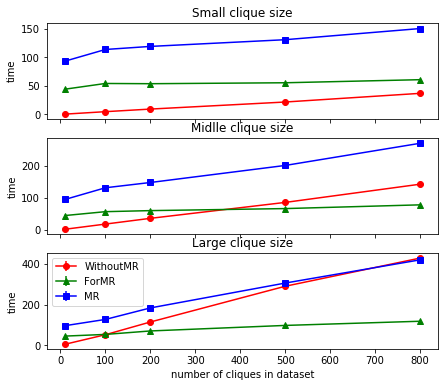

In [3]:
fig, axs = plt.subplots(3,1,figsize=(7,6),sharex = 'col')

for j in range(3):
    size = sizes[j]
    mean = []
    std = []
    for samplesize in samplesizes:
        filename = size + str(samplesize) + "-" + str(samplenum) + ".time"
        df_name = size + str(samplesize) + "-" + str(samplenum)
        df_name = pd.read_csv(filename).to_numpy()
        mean.append(np.mean(df_name,axis = 0))
        std.append(np.std(df_name,axis = 0, ddof = 1))

    std = np.array(std); mean = np.array(mean)
    for i in range(3):
        axs[j].errorbar(x = samplesizes, y=mean[:,i], 
                           yerr=std[:,i], fmt = fmts[i],label = legends[i])  

        
axs[2].set_xlabel('number of cliques in dataset')
axs[0].set_ylabel('time')
axs[1].set_ylabel('time')
axs[2].set_ylabel('time')
axs[0].set_title('Small clique size')
axs[1].set_title('Midlle clique size')
axs[2].set_title('Large clique size')
axs[2].legend()

fig.savefig('Results.png',dpi=150,bbox_inches = 'tight', transparent = True)